start of thr project


In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/AbhishekMali21/STUDENT-GRADE-ANALYSIS-PREDICTION/master/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Cleaning the Dataset

In [ ]:
columns_drop=["address","Pstatus","reason","guardian","schoolsup","famsup","paid","activities","nursery","romantic","internet","G1","G2"]
df.drop(columns=columns_drop,inplace=True)

In [ ]:
df.dtypes

school        object
sex           object
age            int64
famsize       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
traveltime     int64
studytime      int64
failures       int64
higher        object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G3             int64
dtype: object

# Now label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
df['school']=label_encoder.fit_transform(df['school'])
df['sex']=label_encoder.fit_transform(df['sex'])
df['famsize']=label_encoder.fit_transform(df['famsize'])
df['Mjob']=label_encoder.fit_transform(df['Mjob'])
df['Fjob']=label_encoder.fit_transform(df['Fjob'])
df['higher']=label_encoder.fit_transform(df['higher'])

In [ ]:
df.dtypes

school        int64
sex           int64
age           int64
famsize       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
traveltime    int64
studytime     int64
failures      int64
higher        int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G3            int64
dtype: object

# Now seperating data into x and y

In [ ]:
y=df['G3']
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
x=df.drop('G3' , axis=1)
x

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,4,4,0,4,2,2,0,1,4,3,4,1,1,3,6
1,0,0,17,0,1,1,0,2,1,2,0,1,5,3,3,1,1,3,4
2,0,0,15,1,1,1,0,2,1,2,3,1,4,3,2,2,3,3,10
3,0,0,15,0,4,2,1,3,1,3,0,1,3,2,2,1,1,5,2
4,0,0,16,0,3,3,2,2,1,2,0,1,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,2,2,3,3,1,2,2,1,5,5,4,4,5,4,11
391,1,1,17,1,3,1,3,3,2,1,0,1,2,4,5,3,4,2,3
392,1,1,21,0,1,1,2,2,1,1,3,1,5,5,3,3,3,3,3
393,1,1,18,1,3,2,3,2,3,1,0,1,4,4,1,3,4,5,0


# Seperating the data between train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences
372,1,0,17,0,2,2,2,0,1,3,0,1,3,4,3,1,1,3,8
136,0,1,17,0,3,4,0,2,3,2,0,1,5,4,5,2,4,5,0
187,0,1,16,1,2,1,2,2,1,2,0,1,4,2,3,1,2,5,0
213,0,1,18,0,2,2,3,2,1,2,1,1,4,4,4,2,4,5,15
27,0,1,15,0,4,2,1,3,1,1,0,1,2,2,4,2,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0,0,17,0,2,2,0,0,1,2,1,1,3,3,1,1,2,4,0
359,1,0,18,1,1,1,0,3,2,3,0,1,5,3,2,1,1,4,0
323,0,0,17,0,3,1,3,3,1,3,0,1,3,4,3,2,3,5,1
280,0,1,17,1,4,1,3,2,2,1,0,1,4,5,4,2,4,5,30


In [ ]:
y_train

372    11
136     0
187    15
213     8
27     15
       ..
343     0
359    16
323    15
280     8
8      19
Name: G3, Length: 316, dtype: int64

In [ ]:
y_test

188     9
365    10
190    13
353     8
166    10
       ..
149    10
46     11
50     13
227    12
310     0
Name: G3, Length: 79, dtype: int64

In [ ]:
_x_test

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences
188,0,0,17,0,3,3,1,2,1,2,0,1,3,3,3,1,3,3,6
365,1,1,18,0,1,3,0,2,2,2,0,1,3,3,4,2,4,3,4
190,0,0,16,0,2,3,3,3,1,2,0,1,4,3,3,1,1,2,10
353,1,1,19,0,1,1,2,2,3,1,1,1,4,4,4,3,3,5,4
166,0,1,16,0,2,2,2,2,1,2,0,0,4,3,5,2,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,1,15,1,2,1,3,2,4,1,3,1,4,5,5,2,5,5,0
46,0,0,16,1,3,3,2,3,1,2,0,1,2,3,5,1,4,3,12
50,0,0,16,1,2,2,3,3,3,2,0,1,4,3,3,2,3,4,2
227,0,1,17,1,2,3,3,3,1,2,0,1,5,3,3,1,3,3,2


# Building Model

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [ ]:
y_lr_train_pred=lr.predict(x_train)
y_lr_train_pred

array([ 9.63261633, 10.11870494, 11.81366661,  8.85313481, 12.25111819,
        2.12407476, 11.91547998,  8.88990962,  9.60928391, 10.16821435,
        8.64614413,  9.9101199 ,  9.84787229, 10.48566796, 11.70385837,
        3.20712102,  8.56687019, 13.52086704, 12.05538142, 11.44795218,
       13.5771509 , 12.60473118,  4.68819749,  9.05107225, 10.98185923,
       10.58537246, 11.88405005,  9.38258099, 12.59325052, 11.70157073,
        0.90443874, 11.34953207, 12.79316927,  9.11049147, 11.91335671,
       12.38344491, 14.19232284,  8.62398612,  6.61369569,  9.74846297,
       10.17801298, 10.44599135, 11.45517229,  9.61603018,  9.75262361,
       10.44101738, 13.78472904,  4.17032557,  8.94356056,  9.54127487,
        9.87803345,  8.25691883, 11.15760702, 10.42238617,  8.98438131,
        8.42423917, 10.7006316 , 11.36853917, 10.84291784, 10.13074731,
        9.60582782, 10.56435464,  9.83426782, 10.80238155, 11.79139742,
       10.94569784, 12.52149103, 11.57923023, 13.48534037,  8.50

In [ ]:
y_lr_test_pred=lr.predict(x_test)
y_lr_test_pred

array([10.02782069, 10.25174399, 10.16804867,  6.95657536,  7.33607559,
       12.25938853, 11.4169405 , 10.36940868, 13.41323546,  9.00989946,
       10.54992606, 10.71738409,  8.27589086, 11.69467564, 14.28714836,
       10.32822967,  8.10757377,  8.87016288, 10.65760075,  9.29540698,
       -0.85878661, 11.1668144 ,  9.7261539 ,  5.4452166 ,  8.82004401,
       12.48131879, 12.87234055, 11.99214186,  7.70730093, 10.97943414,
        8.25866058, 12.63087778, 13.21979605, 10.25778515, 10.02169378,
       10.47928243, 10.82042475, 11.41303595,  9.24850551,  4.69858056,
       11.76380413, 12.30299147,  7.9360253 ,  9.30439592,  6.30394444,
       10.50525297, 10.43164539,  7.93233726, 11.90130447,  7.68736511,
        9.77855513, 13.22144489,  9.7625037 ,  6.23589637, 11.08470779,
       11.03726773,  9.45943945,  6.30471585, 10.99324845,  3.85308414,
       11.94730183, 10.72612998,  8.30876938, 10.87952461, 10.88436979,
        2.68612171, 12.18487115,  9.13644081, 14.17315837, 10.84

### Evaluate Performance

**now we will evaluate the performance of our model by comparing predicted value kf y by original value of y available in dataset**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [ ]:
print("mean squared error (Train set):",lr_train_mse)

mean squared error (Train set): 17.215200815953946


In [ ]:
print("r2 score (Train set):",lr_train_r2)

r2 score (Train set): 0.236232931090265


In [ ]:
print("mean squared error (test set):",lr_test_mse)

mean squared error (test set): 15.61973846115776


In [ ]:
print("r2 scorer (test set):",lr_test_r2)

r2 scorer (test set): -0.10670255365430226


In [ ]:
lr_result = pd.DataFrame({
    'Model': ['Logical Regression'],
    'Train MSE': [lr_train_mse],
    'Train R2': [lr_train_r2],
    'Test MSE': [lr_test_mse],
    'Test R2': [lr_test_r2]
})

In [ ]:
lr_result = lr_result.transpose()

In [ ]:
lr_result

,0
Model,Logical Regression
Train MSE,17.215201
Train R2,0.236233
Test MSE,15.619738
Test R2,-0.106703


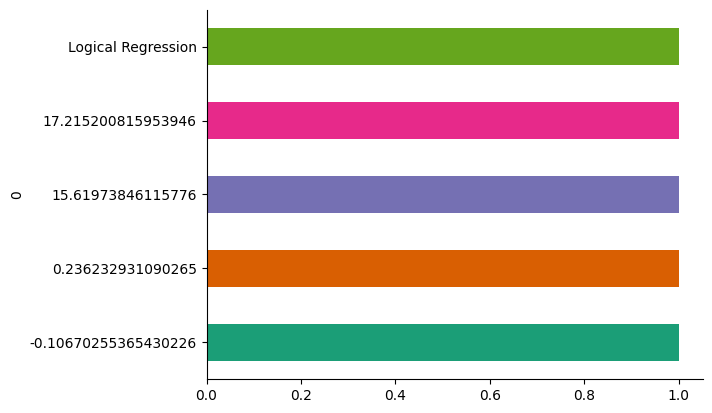

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
lr_result.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open("model.pkl","wb"))

In [ ]:
x

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,4,4,0,4,2,2,0,1,4,3,4,1,1,3,6
1,0,0,17,0,1,1,0,2,1,2,0,1,5,3,3,1,1,3,4
2,0,0,15,1,1,1,0,2,1,2,3,1,4,3,2,2,3,3,10
3,0,0,15,0,4,2,1,3,1,3,0,1,3,2,2,1,1,5,2
4,0,0,16,0,3,3,2,2,1,2,0,1,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,2,2,3,3,1,2,2,1,5,5,4,4,5,4,11
391,1,1,17,1,3,1,3,3,2,1,0,1,2,4,5,3,4,2,3
392,1,1,21,0,1,1,2,2,1,1,3,1,5,5,3,3,3,3,3
393,1,1,18,1,3,2,3,2,3,1,0,1,4,4,1,3,4,5,0


In [ ]:
import matplotlib.pyplot as plt
plt.plot([x_test], [y_lr_test_predict], color='red', label='Regression Line')

plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64